# The hope of this code is to be able to do fundemental physics with simple force plate data


## Fundemental Physics:


    - Momentum Principle
    
    
## Things to include:
    - graphs +
    - integration for a single jump +
    - some animation of the forces
    - "Normalizization" +
    
    
    - long jump, broad jump +
    


In [112]:

import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd


## Read in data file and make data frame

In [113]:
filename='DoubleLegJump.txt'
amtidata = loadtxt(filename, dtype = float, delimiter = ',', skiprows = 0)
#df = pd.DataFrame(datafile)

In [114]:
headings = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']



df = pd.DataFrame(amtidata, columns = headings)

## Graph to see what the data looks like

<Figure size 432x288 with 0 Axes>

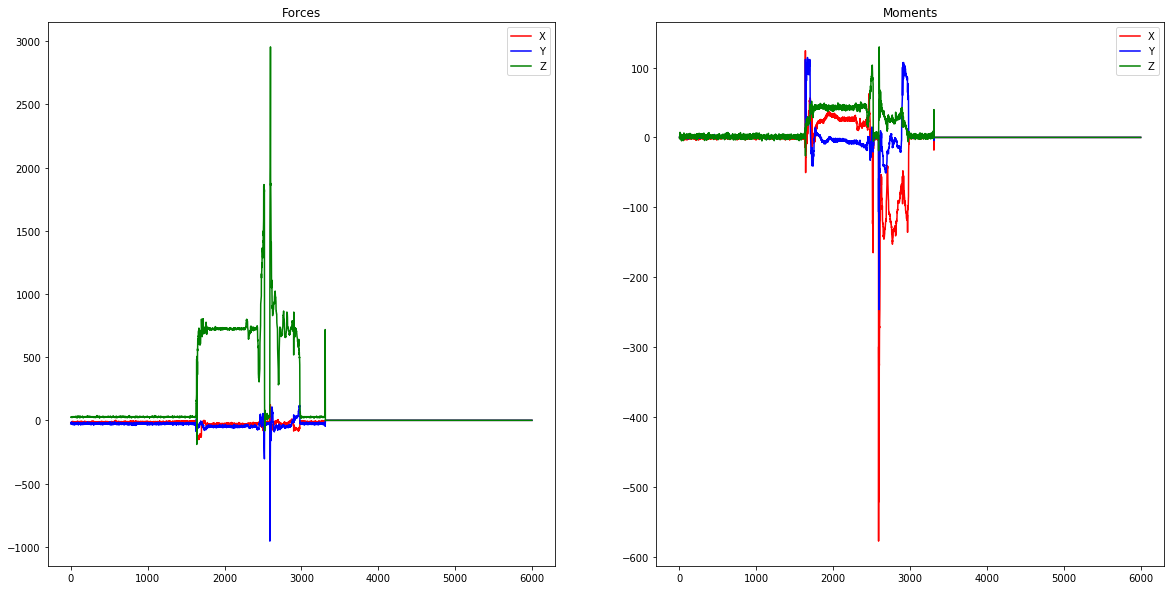

In [116]:
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(df['Fx'], 'r', label = 'X')
plt.plot(df['Fy'], 'b', label = 'Y')
plt.plot(df['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')


plt.subplot(1,2,2)
plt.plot(df['Mx'], 'r', label = 'X')
plt.plot(df['My'], 'b', label = 'Y')
plt.plot(df['Mz'], 'g', label = 'Z')
plt.legend()
plt.title('Moments')

#plt.tight_layout()
plt.legend()
plt.show()

## Trimming
... if needed...

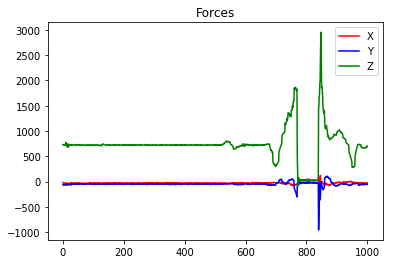

In [123]:
df1 = df.copy()
df1 = pd.DataFrame(df1.loc[1750:2750,:], columns = headings) # by looking at the graph above, there is pleanty of data that I can trim off
N = df1.shape[0] # length of the new data frame just incase
time = np.arange(0, N, 1) # time array of the new data frame
df1.index = time # starts the index at zero 

plt.plot( df1['Fx'], 'r', label = 'X')
plt.plot( df1['Fy'], 'b', label = 'Y')
plt.plot( df1['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')
plt.show()

## "Normalization"

Would need a baseline measurement of the subject standing on the plate. Take the average force of a section from that event. Then subtract that number from every data point. 

In [124]:
M = df1.loc[0:250,'Fz'].mean()

dfNorm = df1.copy()
dfNorm = pd.DataFrame(dfNorm, index = time, columns = headings)

for i in range(N):
    dfNorm['Fz'][i] = dfNorm['Fz'][i] - M
    i = i + 1
    

## Graph again

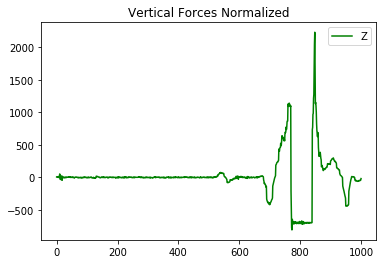

In [125]:
plt.figure()

#plt.subplot(1,2,1)
# plt.plot(dfNorm['Fx'], 'r', label = 'X')
# plt.plot(dfNorm['Fy'], 'b', label = 'Y')
plt.plot(dfNorm['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Vertical Forces Normalized')

plt.legend()
plt.show()

## Numerical integration to calculate the velocity and impulse/momentum

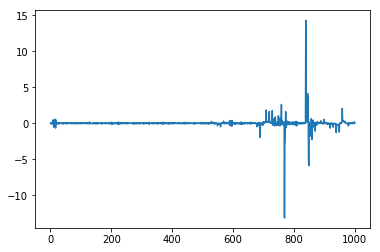

In [126]:
# Impulse = F*delta t

freq = 100
N = dfNorm.shape[0]
J = np.zeros(N)
dt = 1/freq

for i in range(N-1):
    J[i] = (dfNorm['Fz'][i+1]-dfNorm['Fz'][i])*dt
    
plt.plot(J) 

(600, 1000)

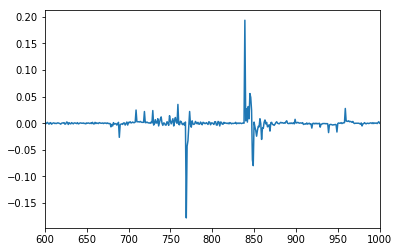

In [129]:
g = 9.8
m = M/9.8
v = np.zeros(N)
for i in range(N-1):
    v[i] = J[i]/m
    
plt.plot(v)
plt.xlim(600,1000)

836.93661